### **Telco Customer Churn**

### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

### **Business Problem Understanding**

**Context**

Jika kita lihat dari Dataset, permasalahan utama yang diperoleh dari dataset adalah profil pelanggan yang telah meninggalkan layanan perusahaan Telco. Churn adalah nama lain dari Customer Retention Rate, yaitu tingkat pelanggan yang meninggalkan layanan dan berpindah atau berpaling dengan layanan pesaing.

**Problem Statement**

Perusahaan telekomunikasi menghadapi tingkat customer churn yang cukup tinggi, yaitu pelanggan yang berhenti berlangganan dan pindah ke kompetitor. Dilakukan pemahaman dan analisis untuk mengetahui setiap pelanggan yang memiliki tingkat risiko customner retention dan mengidentifikasi faktor yang dapat menyebabkan churn.

**Goals**

Tujuan dari pembuatan model adalah untuk mengetahui faktor yang dapat menyebabkan churn serta mendeteksi pelanggan yang berisiko tinggi untuk churn. Hasil dari prediksi dapat digunakan untuk mengetahui rekomendasi yang tepat untuk mencegah potensi churn.

**Analytic Approach**

Tindakan yang dilakukan adalah menganalisis data untuk mengidentifikasi pola yang muncul dari fitur yang ada.

**Metric Evaluation**

Evaluasi metrik yang akan digunakan berupa Recall, Precision, F1 Score, dan ROC. Tujuan dari penggunaan metrik tersebut adalah untuk mencegah potensi churn yang lebih besar.

- Dataset merupakan data Telco Customer Churn.
- Setiap baris data merepresentasikan informasi terkait pelanggan.



In [141]:

import numpy as np 
import pandas as pd 
import seaborn as sns 
import pickle
from scipy.stats import randint, uniform
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer 
from sklearn.impute import KNNImputer 
from sklearn.preprocessing import OneHotEncoder
from category_encoders import OrdinalEncoder, BinaryEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import VotingClassifier, StackingClassifier, VotingRegressor

In [142]:
# Load dataset
path = "/Users/HP/Documents/Kelas Purwadhika/"

df = pd.read_csv(path + "data_telco_customer_churn.csv")
df

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No
...,...,...,...,...,...,...,...,...,...,...,...
4925,No,15,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,103.45,No
4926,Yes,10,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,91.10,No
4927,No,58,No internet service,No internet service,No,No internet service,No internet service,Two year,No,20.75,No
4928,No,1,No,No,Fiber optic,No,No,Month-to-month,Yes,69.75,Yes


#### **Data Cleaning**

In [143]:
df

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No
...,...,...,...,...,...,...,...,...,...,...,...
4925,No,15,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,103.45,No
4926,Yes,10,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,91.10,No
4927,No,58,No internet service,No internet service,No,No internet service,No internet service,Two year,No,20.75,No
4928,No,1,No,No,Fiber optic,No,No,Month-to-month,Yes,69.75,Yes


In [144]:
df.duplicated().sum()

np.int64(77)

In [145]:
df.drop_duplicates()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No
...,...,...,...,...,...,...,...,...,...,...,...
4925,No,15,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,103.45,No
4926,Yes,10,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,91.10,No
4927,No,58,No internet service,No internet service,No,No internet service,No internet service,Two year,No,20.75,No
4928,No,1,No,No,Fiber optic,No,No,Month-to-month,Yes,69.75,Yes


In [146]:
df["OnlineSecurity"] = df["OnlineSecurity"].replace("No internet service", "No")
df["OnlineBackup"] = df["OnlineBackup"].replace("No internet service", "No")
df["DeviceProtection"] = df["DeviceProtection"].replace("No internet service", "No")
df["TechSupport"] = df["TechSupport"].replace("No internet service", "No")
df["Churn"] = df["Churn"].map({"Yes":1, "No":0})
df["Dependents"] = df["Dependents"].map({"Yes":1, "No":0})
df["PaperlessBilling"] = df["PaperlessBilling"].map({"Yes":1, "No":0})
df

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,1,9,No,No,DSL,Yes,Yes,Month-to-month,1,72.90,1
1,0,14,No,Yes,Fiber optic,Yes,No,Month-to-month,1,82.65,0
2,0,64,Yes,No,DSL,Yes,Yes,Two year,0,47.85,1
3,0,72,Yes,Yes,DSL,Yes,Yes,Two year,0,69.65,0
4,0,3,No,No,No,No,No,Month-to-month,1,23.60,0
...,...,...,...,...,...,...,...,...,...,...,...
4925,0,15,No,No,Fiber optic,Yes,Yes,Month-to-month,1,103.45,0
4926,1,10,No,No,Fiber optic,Yes,Yes,Month-to-month,1,91.10,0
4927,0,58,No,No,No,No,No,Two year,0,20.75,0
4928,0,1,No,No,Fiber optic,No,No,Month-to-month,1,69.75,1


#### **Exploratory Data Analysis**

#### **Distribusi Target**

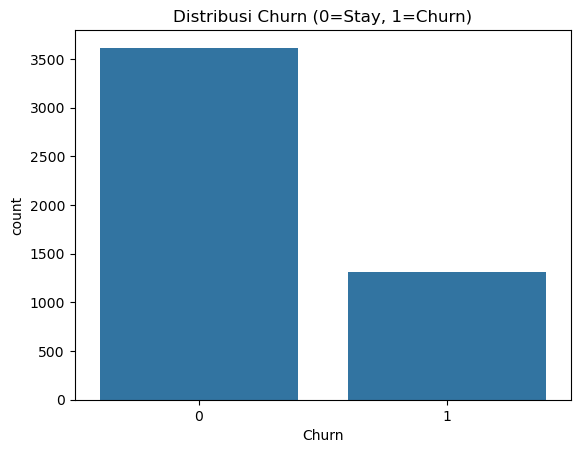

In [147]:
sns.countplot(x="Churn", data=df)
plt.title("Distribusi Churn (0=Stay, 1=Churn)")
plt.show()

#### **Fitur Numerik**

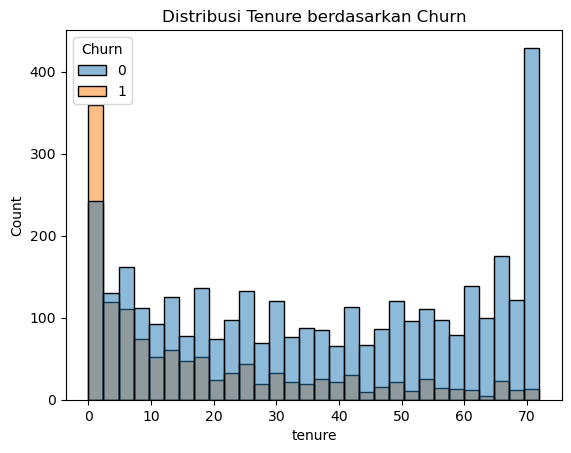

In [148]:
sns.histplot(data=df, x="tenure", hue="Churn", bins=30, kde=False)
plt.title("Distribusi Tenure berdasarkan Churn")
plt.show()

#### **Hubungan Fitur Kategorikal Churn**

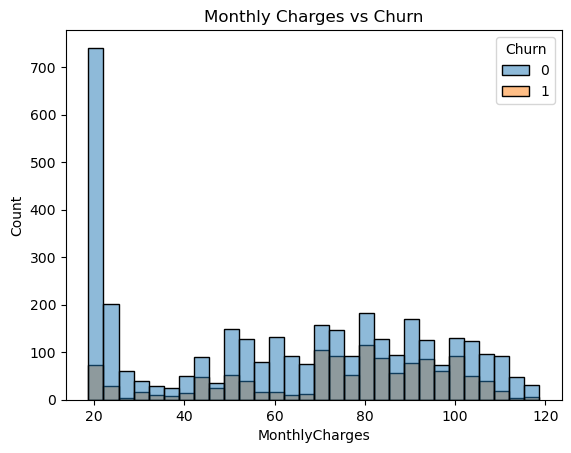

In [149]:
sns.histplot(data=df, x="MonthlyCharges", hue="Churn", bins=30, kde=False)
plt.title("Monthly Charges vs Churn")
plt.show()

#### **Korelasi**

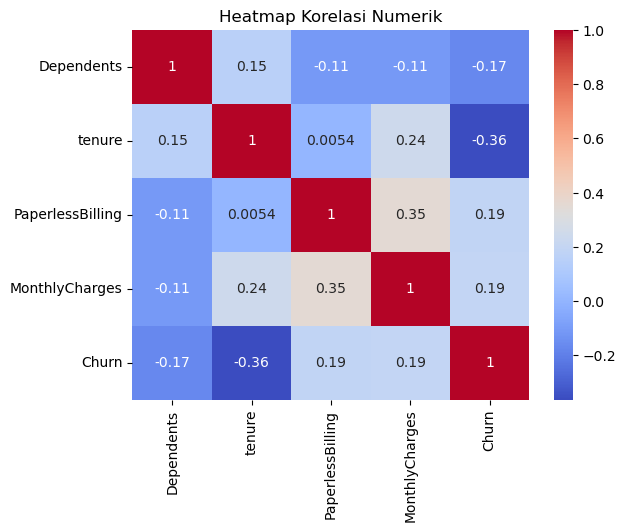

In [150]:
num_df = df.select_dtypes(include=["int64","float64"])

sns.heatmap(num_df.corr(), cmap="coolwarm", annot=True)
plt.title("Heatmap Korelasi Numerik")
plt.show()

In [151]:
pd.crosstab(df["Contract"], df["Churn"], normalize="index")

Churn,0,1
Contract,,
Month-to-month,0.567071,0.432929
One year,0.899240,0.100760
Two year,0.972342,0.027658


In [152]:
num_cols = ["tenure", "MonthlyCharges"]
cat_cols = [
    "Dependents",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "InternetService",
    "Contract",
    "PaperlessBilling",
]

In [153]:
X = df.drop(columns=["Churn"])
y = df["Churn"]
display(X.head(), y.head())

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges
0,1,9,No,No,DSL,Yes,Yes,Month-to-month,1,72.90
1,0,14,No,Yes,Fiber optic,Yes,No,Month-to-month,1,82.65
2,0,64,Yes,No,DSL,Yes,Yes,Two year,0,47.85
3,0,72,Yes,Yes,DSL,Yes,Yes,Two year,0,69.65
4,0,3,No,No,No,No,No,Month-to-month,1,23.60


0    1
1    0
2    1
3    0
4    0
Name: Churn, dtype: int64

In [154]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
)

In [155]:
num_cols = X.select_dtypes(include=["int64","float64"]).columns
cat_cols = X.select_dtypes(include=["object"]).columns

In [156]:
# Menggunakan One Hot
preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_cols)
    ]
)

In [157]:
# Menggunakan Logistic Regression
pipe = Pipeline(steps=[
    ("prep", preprocess),
    ("clf", LogisticRegression(max_iter=1000, class_weight="balanced"))
])

In [158]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Dependents', 'tenure', 'PaperlessBilling', 'MonthlyCharges'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['OnlineSecurity', 'OnlineBackup', 'InternetService', 'DeviceProtection',
       'TechSupport', 'Contract'],
      dtype='object'))])),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [159]:
y_pred = pipe.predict(X_test)
y_prob = pipe.predict_proba(X_test)[:,1]

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=["Stay(0)", "Churn(1)"]))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nROC-AUC:", roc_auc_score(y_test, y_prob))


=== Classification Report ===
              precision    recall  f1-score   support

     Stay(0)       0.91      0.72      0.80       723
    Churn(1)       0.51      0.80      0.62       263

    accuracy                           0.74       986
   macro avg       0.71      0.76      0.71       986
weighted avg       0.80      0.74      0.76       986


Confusion Matrix:
[[521 202]
 [ 53 210]]

ROC-AUC: 0.8413507302168299


In [160]:
y_pred = pipe.predict(X_test)            
y_prob = pipe.predict_proba(X_test)[:,1]

In [161]:
threshold = 0.3
y_pred_thr = (y_prob >= threshold).astype(int)

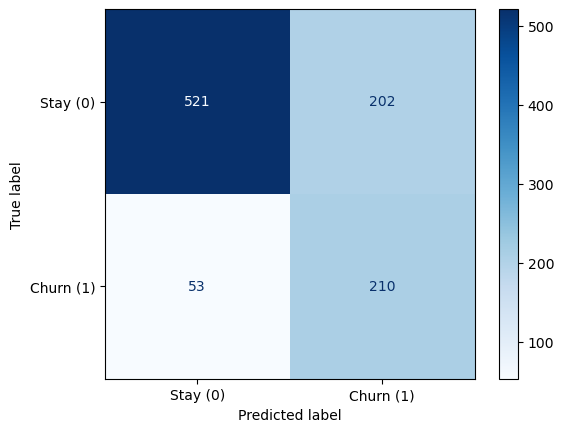

In [162]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=["Stay (0)", "Churn (1)"])
disp.plot(cmap="Blues")

In [163]:
preprocess_xgb = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_cols)
    ]
)

In [164]:
xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=(y.value_counts()[0]/y.value_counts()[1]),  
    random_state=0,
    use_label_encoder=False,
    eval_metric="logloss"
)

In [165]:
pipe_xgb = Pipeline(steps=[
    ("prep", preprocess_xgb),
    ("model", xgb)
])

In [166]:
pipe_xgb.fit(X_train, y_train)

C:\Users\HP\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [16:07:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Dependents', 'tenure', 'PaperlessBilling', 'MonthlyCharges'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['OnlineSecurity', 'OnlineBackup', 'InternetService', 'DeviceProtection',
       'TechSupport', 'Contract'],
      dtype='object'))]))...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=300, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [167]:
y_pred_xgb = pipe_xgb.predict(X_test)
y_prob_xgb = pipe_xgb.predict_proba(X_test)[:, 1]

=== XGBoost ===
              precision    recall  f1-score   support

     Stay(0)       0.86      0.81      0.84       723
    Churn(1)       0.56      0.65      0.60       263

    accuracy                           0.77       986
   macro avg       0.71      0.73      0.72       986
weighted avg       0.78      0.77      0.77       986

Confusion Matrix:
 [[588 135]
 [ 92 171]]
ROC-AUC: 0.824130024349326


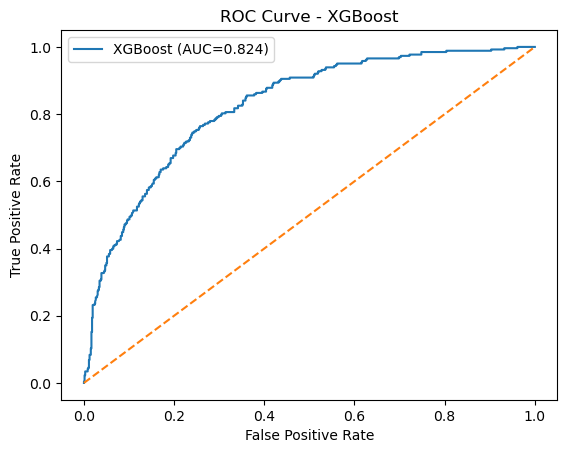

In [168]:
print("=== XGBoost ===")
print(classification_report(y_test, y_pred_xgb, target_names=["Stay(0)","Churn(1)"]))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_xgb))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_xgb)
plt.plot(fpr, tpr, label=f"XGBoost (AUC={roc_auc_score(y_test, y_prob_xgb):.3f})")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost")
plt.legend()
plt.show()

#### **Hyperparameter Tuning**

In [169]:
param_grid = {
    "clf__C": [0.01, 0.1, 1, 10],
    "clf__penalty": ["l1", "l2"],
    "clf__solver": ["liblinear", "saga"],
    "clf__class_weight": [None, "balanced"]
}


In [170]:

grid_lr = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=5,
    scoring="f1",  
    n_jobs=-1,
    verbose=2
)

In [171]:
grid_lr.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         Index(['Dependents', 'tenure', 'PaperlessBilling', 'MonthlyCharges'], dtype='object')),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         Index(['OnlineSecurity', 'OnlineBackup', 'InternetService', 'DeviceProtection',
       'TechSupport', 'Contract'],
      dtype='object'))])),
                                       ('clf',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=1000))]),
             n_jobs=-1,
             param_grid={'clf__C': [0.01, 0.1, 1, 10],
                         'clf__class_weight': [None, 'balanced'],
                         'clf__penalty': ['l1', 'l2'],
                         'clf__solver': ['liblinear', 'saga']},
             scoring='f1', verbose=2)

In [172]:
print("Best Params:", grid_lr.best_params_)
print("Best Score:", grid_lr.best_score_)

# Evaluasi di test set
y_pred_lr_tuned = grid_lr.predict(X_test)
y_prob_lr_tuned = grid_lr.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred_lr_tuned, target_names=["Stay(0)","Churn(1)"]))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_lr_tuned))

Best Params: {'clf__C': 0.1, 'clf__class_weight': 'balanced', 'clf__penalty': 'l2', 'clf__solver': 'saga'}
Best Score: 0.6266703721039881
              precision    recall  f1-score   support

     Stay(0)       0.91      0.72      0.80       723
    Churn(1)       0.51      0.80      0.62       263

    accuracy                           0.74       986
   macro avg       0.71      0.76      0.71       986
weighted avg       0.80      0.74      0.76       986

ROC-AUC: 0.8417924890480621


#### **Feature Selection**

In [177]:
best_lr = grid_lr.best_estimator_          
ct = best_lr.named_steps["prep"]           
clf = best_lr.named_steps["clf"]           


fitted_transformers = {name: (trans, cols) for name, trans, cols in ct.transformers_}

num_cols_fitted = fitted_transformers["num"][1]  
ohe = fitted_transformers["cat"][0]              
cat_cols_fitted = fitted_transformers["cat"][1] 


def get_ohe_feature_names(ohe, input_features):
    if hasattr(ohe, "get_feature_names_out"):
        try:
            return list(ohe.get_feature_names_out(input_features))
        except TypeError:
            return list(ohe.get_feature_names_out())
    if hasattr(ohe, "get_feature_names"):
        return list(ohe.get_feature_names(input_features))
    # fallback dari categories_
    names = []
    for col, cats in zip(input_features, ohe.categories_):
        names.extend([f"{col}_{c}" for c in cats])
    return names

cat_feature_names = get_ohe_feature_names(ohe, cat_cols_fitted)

# Gabungkan semua fitur
all_feature_names = list(num_cols_fitted) + cat_feature_names

# Ambil koefisien logistic regression
coefs = clf.coef_.ravel()

print(len(all_feature_names), "feature names")
print(len(coefs), "coefficients")

# Pastikan jumlahnya sama
assert len(all_feature_names) == len(coefs), \
    f"Mismatch: {len(all_feature_names)} feature names vs {len(coefs)} coefficients"


coef_df = (
    pd.DataFrame({
        "feature": all_feature_names,
        "coef": coefs,
        "odds_ratio": np.exp(coefs)
    })
    .sort_values("coef", ascending=False)
)

print("=== Top fitur MENAIKKAN churn ===")
display(coef_df.head(10))
print("\n=== Top fitur MENURUNKAN churn ===")
display(coef_df.tail(10))

18 feature names
18 coefficients
=== Top fitur MENAIKKAN churn ===


,feature,coef,odds_ratio
15,Contract_Month-to-month,0.868761,2.383956
3,MonthlyCharges,0.506916,1.660163
9,InternetService_Fiber optic,0.411654,1.509311
4,OnlineSecurity_No,0.231144,1.260041
2,PaperlessBilling,0.211252,1.235223
6,OnlineBackup_No,0.190648,1.210033
13,TechSupport_No,0.126895,1.135297
8,InternetService_DSL,0.096179,1.100956
12,DeviceProtection_Yes,0.025938,1.026277
11,DeviceProtection_No,-0.026490,0.973858



=== Top fitur MENURUNKAN churn ===


,feature,coef,odds_ratio
12,DeviceProtection_Yes,0.025938,1.026277
11,DeviceProtection_No,-0.026490,0.973858
16,Contract_One year,-0.121740,0.885378
14,TechSupport_Yes,-0.127446,0.880341
0,Dependents,-0.147350,0.862992
7,OnlineBackup_Yes,-0.191199,0.825968
5,OnlineSecurity_Yes,-0.231696,0.793187
10,InternetService_No,-0.508385,0.601466
1,tenure,-0.703246,0.494976
17,Contract_Two year,-0.747573,0.473514


In [180]:
with open("logistic_regression_churn.pkl", "wb") as f:
    pickle.dump(best_lr, f)

In [181]:
with open("logistic_regression_churn.pkl", "rb") as f:
    loaded_model = pickle.load(f)

Dari hasil diatas, faktor yang paling menentukan peningkatan risiko churn adalah :
- Contract Month - to - Month
- MonthlyCharges yang tinggi
- InternetService_FiberOptic
- OnlineSecurity_No
- OnlineBackup_No
- PaperlessBilling=Yes

Sedangkan faktoy yang paling menentukan penurunan risiko churn adalah :
- Contract Two Year
- Tenure tinggi 
- InternetService_No
- OnlineSecurity_Yes
- OnlineBackup_Yes
- TechSupport_Yes

#### **Rekomendasi**

- Mengubah Kontrak Bulanan Menjadi Tahunan
- Mempertahankan Pelanggan Dengan Billing Yang Tinggi
- Memperkuat Kualitas Fiber Optic
- Mendorong Penggunaan Add On
- Mempertahankan Loyalitas pelanggan lama dengan reward dan diskon